In [125]:
# importing necessary packages

import scanpy as sc
import pandas as pd
import numpy as np
import scvi
import seaborn as sns
import importlib


In [126]:
#Preprocessing

In [127]:
#reading file
adata = sc.read_csv(r'C:\Users\dahad\OneDrive\SingleCell\GSE171524_RAW\GSM5226574_C51ctr_raw_counts.csv.gz').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [128]:
# Filtering for mitochondrial genes
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [129]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [130]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [131]:
# Ribosomal genes reference table
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [132]:
# Does our adata table match with the ribosomal genes table, if yes, print
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [133]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [134]:
#calculate qc metrics - used to assess data quality and identify potential issues, such as doublets, empty droplets, or low-quality cells/genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [135]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [136]:
# no need to filter total counts as data already has min 400 genes per cell
adata.obs.sort_values('total_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [137]:
#Filtering for genes that are present in a minumem of 3 cells
sc.pp.filter_genes(adata, min_cells=3)
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


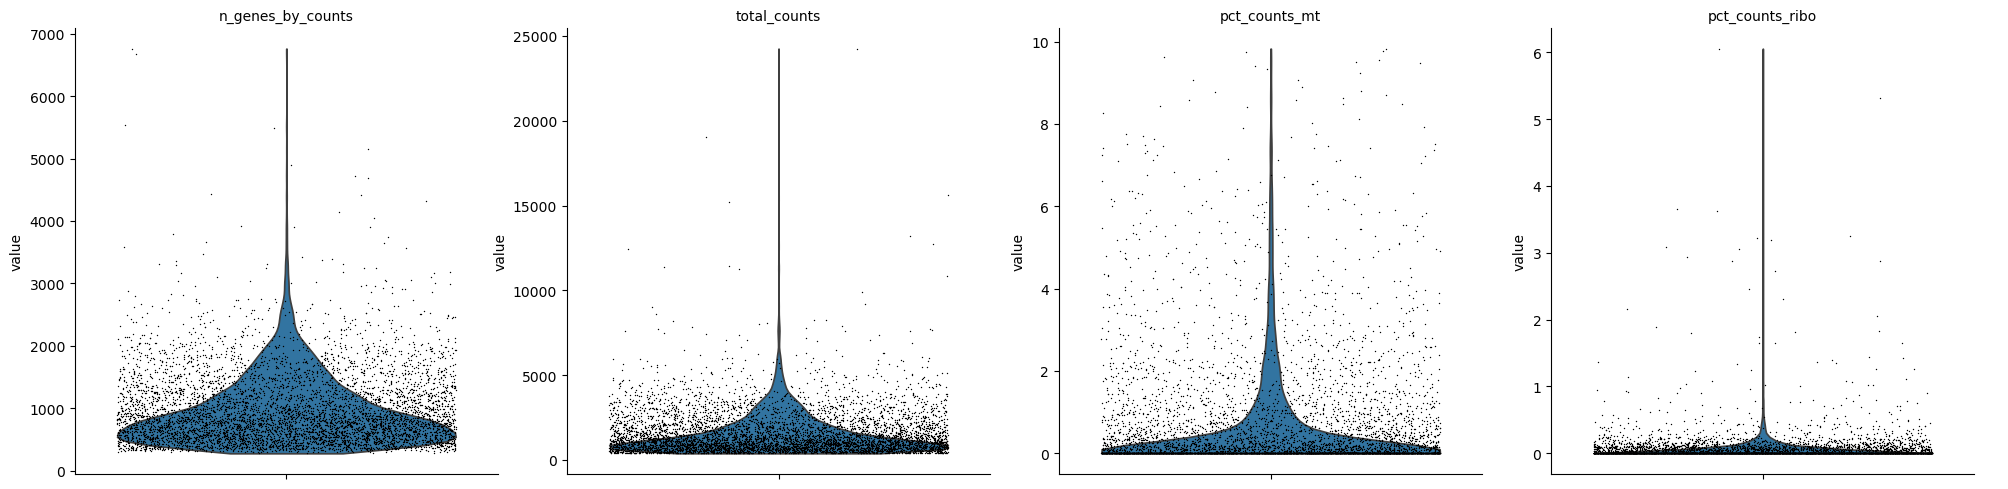

In [138]:
# plotting qc metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [139]:
# Filtering out ouliers. Keeping 98th percentile
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .99)

In [140]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [141]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ATGACCAGTCTTCATT-1_1,2742,6484.0,6.0,0.092535,1.0,0.015423
CTTACCGTCAGACATC-1_1,2530,6404.0,108.0,1.686446,13.0,0.202998
CCGGACACACTCGATA-1_1,2733,6204.0,241.0,3.884590,5.0,0.080593
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537
GCCCGAACAAACTAAG-1_1,2521,5962.0,125.0,2.096612,3.0,0.050319
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [142]:
# a cell with less than 20% mitochondrial transcripts is often considered low quality, potentially indicating cell stress, death, or contamination
adata = adata[adata.obs.pct_counts_mt < 20]

In [143]:
# High ribosomal (but more so high mitochondrial) counts can mean stressed or dying cells.
adata = adata[adata.obs.pct_counts_ribo < 2]

In [144]:
# this dataset has been filtered out outliers
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ATGACCAGTCTTCATT-1_1,2742,6484.0,6.0,0.092535,1.0,0.015423
CTTACCGTCAGACATC-1_1,2530,6404.0,108.0,1.686446,13.0,0.202998
CCGGACACACTCGATA-1_1,2733,6204.0,241.0,3.884590,5.0,0.080593
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537
GCCCGAACAAACTAAG-1_1,2521,5962.0,125.0,2.096612,3.0,0.050319
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [145]:
# Normalization - important as there is a lot of varia

In [146]:
adata.X.sum(axis = 1)

array([6482., 6402., 6203., ...,  410.,  405.,  410.], dtype=float32)

In [147]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

C:\Users\dahad\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [148]:
sc.pp.log1p(adata) #change to log counts to stabilize the variance

In [149]:
adata.X.sum(axis = 1)

array([3506.1545 , 3203.391  , 3607.6865 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [150]:
adata.raw = adata

In [151]:
# Clustering

In [152]:
#  identifying and focusing on highly variable genes (HVGs) is crucial because they are the genes that exhibit significant variation across 
# different cells within a population, reflecting cell-to-cell heterogeneity and underlying biological differences
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011024,2.697180,1.171154
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028847,2.246493,-0.140389
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002604,1.622770,-1.955484
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270239,2.279512,-0.044300
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006615,1.947498,-1.010492
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.152833,2.374171,0.231166
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.872615,2.465020,-0.398414
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150397,2.257242,-0.109107
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002772,1.579834,-2.080431


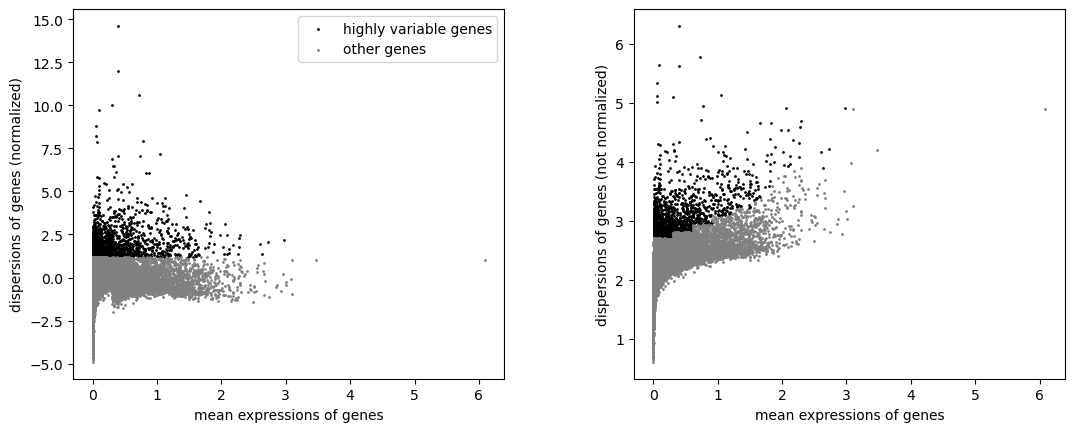

In [153]:
sc.pl.highly_variable_genes(adata)

In [154]:
adata = adata[:, adata.var.highly_variable] # filtering out the not highly valuable gene

In [155]:
#regress out the differences that occur due to total counts, mitochondrial counts and ribosomal counts - why?
# remove variations due processing and sample quality
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

C:\Users\dahad\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:709: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [156]:
sc.pp.scale(adata, max_value=10) # normalize each gene to the unit variance of that gene

In [157]:
# principal component analysis - to further reduce the dimentions of the data (approx 30 principal compenents)
sc.tl.pca(adata, svd_solver='arpack')

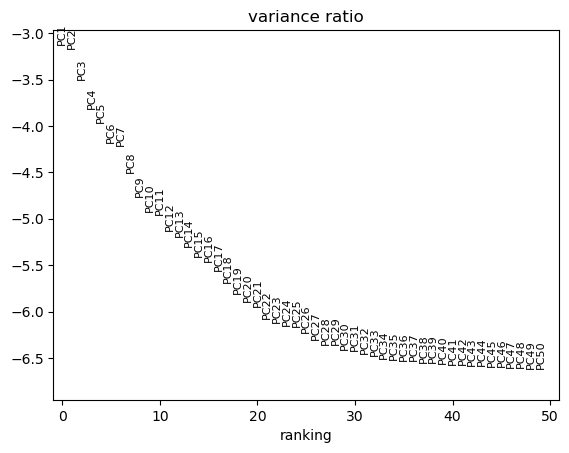

In [158]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [159]:
sc.pp.neighbors(adata, n_pcs = 30) # as it is elbowing here

In [160]:
sc.tl.umap(adata)


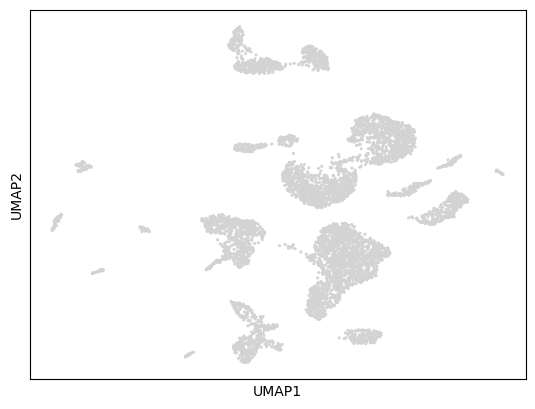

In [161]:
# project 30 dimensions into 2 dimensions
sc.pl.umap(adata)

In [162]:
!pip3 install leidenalg

In [163]:
sc.tl.leiden(adata, resolution = 0.5)

In [164]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
ATGACCAGTCTTCATT-1_1,2742,6484.0,6.0,0.092535,1.0,0.015423,1
CTTACCGTCAGACATC-1_1,2530,6404.0,108.0,1.686446,13.0,0.202998,2
CCGGACACACTCGATA-1_1,2733,6204.0,241.0,3.884590,5.0,0.080593,11
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
GCCCGAACAAACTAAG-1_1,2521,5962.0,125.0,2.096612,3.0,0.050319,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


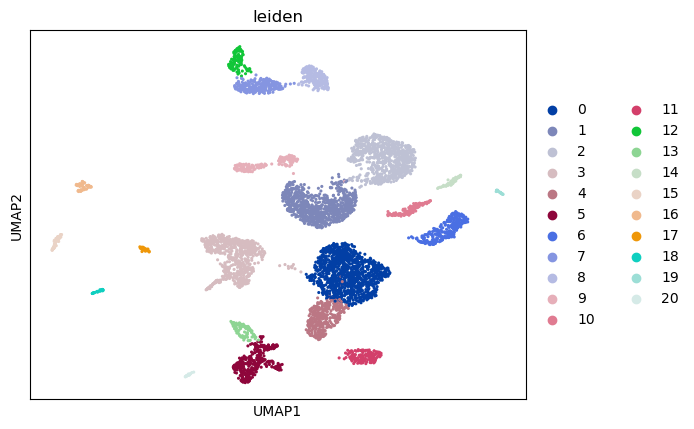

In [165]:
sc.pl.umap(adata, color=['leiden'])

In [166]:
# Find markers/ cell types